In [146]:
import torch

import matplotlib.pyplot as plt

from torch import nn

In [147]:
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Torch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

Matplotlib version: 3.9.2
Torch version: 2.5.0+cu124
CUDA available: True
CUDA version: 12.4


# Data (preparing and loading)

In [148]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step)
y = weight * X + bias

In [149]:
X

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900])

In [150]:
y

tensor([0.3000, 0.3070, 0.3140, 0.3210, 0.3280, 0.3350, 0.3420, 0.3490, 0.3560,
        0.3630, 0.3700, 0.3770, 0.3840, 0.3910, 0.3980, 0.4050, 0.4120, 0.4190,
        0.4260, 0.4330, 0.4400, 0.4470, 0.4540, 0.4610, 0.4680, 0.4750, 0.4820,
        0.4890, 0.4960, 0.5030, 0.5100, 0.5170, 0.5240, 0.5310, 0.5380, 0.5450,
        0.5520, 0.5590, 0.5660, 0.5730, 0.5800, 0.5870, 0.5940, 0.6010, 0.6080,
        0.6150, 0.6220, 0.6290, 0.6360, 0.6430, 0.6500, 0.6570, 0.6640, 0.6710,
        0.6780, 0.6850, 0.6920, 0.6990, 0.7060, 0.7130, 0.7200, 0.7270, 0.7340,
        0.7410, 0.7480, 0.7550, 0.7620, 0.7690, 0.7760, 0.7830, 0.7900, 0.7970,
        0.8040, 0.8110, 0.8180, 0.8250, 0.8320, 0.8390, 0.8460, 0.8530, 0.8600,
        0.8670, 0.8740, 0.8810, 0.8880, 0.8950, 0.9020, 0.9090, 0.9160, 0.9230,
        0.9300, 0.9370, 0.9440, 0.9510, 0.9580, 0.9650, 0.9720, 0.9790, 0.9860,
        0.9930])

### Splitting the data

In [151]:
train_size = int(0.8 * len(X))
validation_size = int(0.1 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_validation = X[train_size:train_size + validation_size]
y_validation = y[train_size:train_size + validation_size]

X_test = X[train_size + validation_size:]
y_test = y[train_size + validation_size:]

In [152]:
len(X_train), len(X_validation), len(X_test)

(80, 10, 10)

In [153]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    validation_data=X_validation,
    validation_labels=y_validation,
    predictions=None
):
    plt.figure(figsize=(12, 6))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Train data")
    plt.scatter(validation_data, validation_labels, c='g', s=4, label="Validation data")

    if predictions is not None:
        plt.scatter(validation_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()

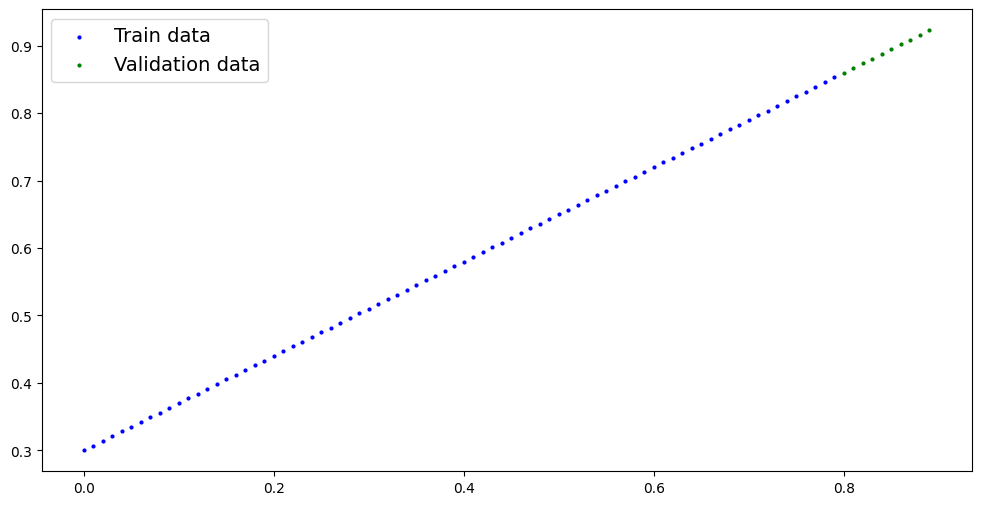

In [154]:
plot_predictions()

# Build Model

In [155]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()

        self.weights = nn.Parameter(
            torch.randn(
                1,
                requires_grad=True,
                dtype=torch.float
            )
        )
        self.bias = nn.Parameter(
            torch.randn(
                1,
                requires_grad=True,
                dtype=torch.float
            )
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [156]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [157]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [158]:
weight, bias

(0.7, 0.3)

In [159]:
with torch.inference_mode(): # turn off gradient tracking
    y_preds = model_0(X_validation)

y_preds

tensor([0.3982, 0.4015, 0.4049, 0.4083, 0.4116, 0.4150, 0.4184, 0.4217, 0.4251,
        0.4285])

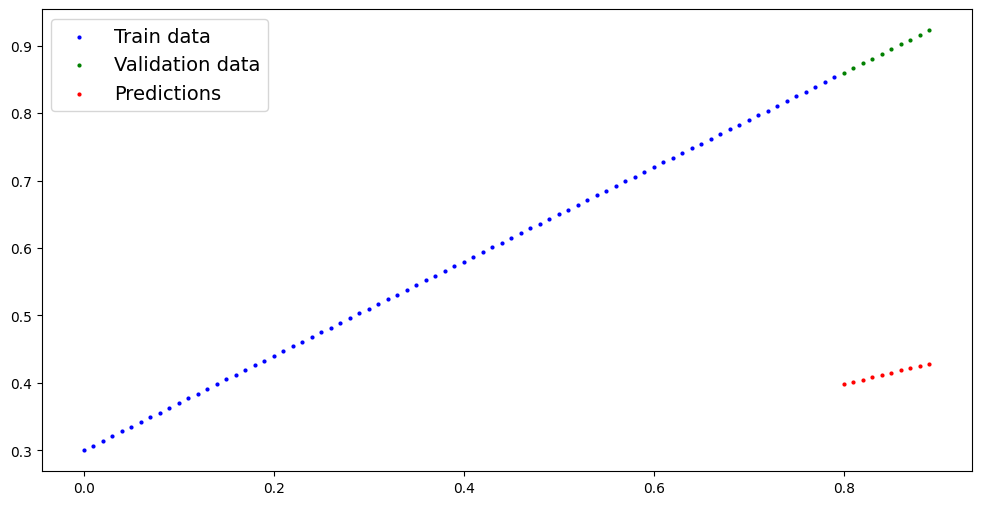

In [160]:
plot_predictions(predictions=y_preds)

# Train Model

In [161]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [166]:
def train_model(
    model: nn.Module,
    X_train: torch.Tensor,
    y_train: torch.Tensor,
    X_validation: torch.Tensor,
    y_validation: torch.Tensor,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer,
    epochs: int = 1000
):
    for epoch in range(epochs):
        model.train() # sets all parameters that have requires_grad=True to train mode

        y_preds = model(X_train) # forward pass

        loss = loss_fn(y_preds, y_train) # compute the loss between the predictions and the target values

        optimizer.zero_grad() # clear the gradients of optimizer (by default the gradients accumulate)

        loss.backward() # perform a backward pass (backpropagation)

        optimizer.step() # by default how the optimizer changes will accumulate through the loop

        if (epoch + 1) % 100 == 0:
            model.eval() # turns off different settings not needed for evaluation/testing (dropout, batch norm, ...)

            with torch.inference_mode(): # turns off gradient tracking
                y_preds = model(X_validation)

                validation_loss = loss_fn(y_preds, y_validation)

            print(f"Epoch: {epoch}, Loss: {loss.item()}, Validation loss: {validation_loss.item()}")
            print(f"Weights: {model.weights.item()}, Bias: {model.bias.item()}")

            plot_predictions(predictions=y_preds)

Epoch: 99, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


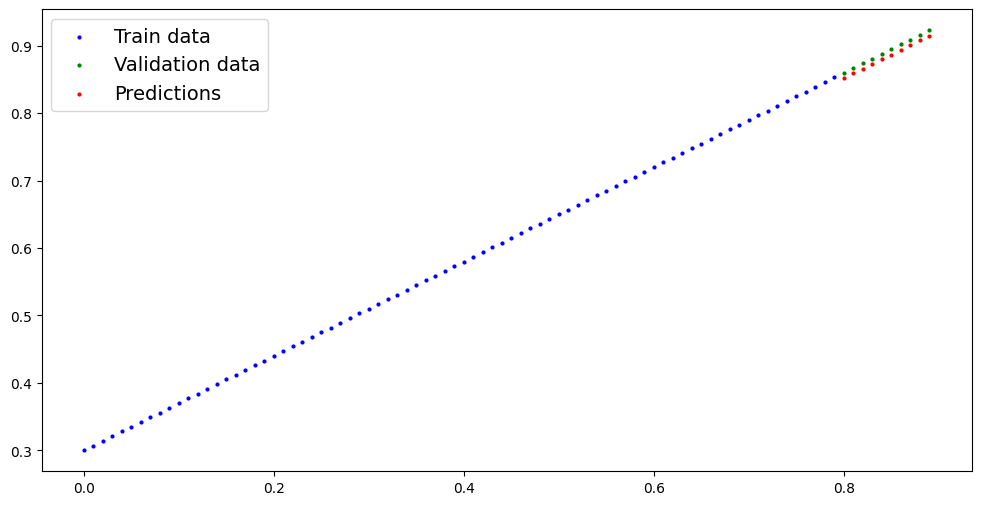

Epoch: 199, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


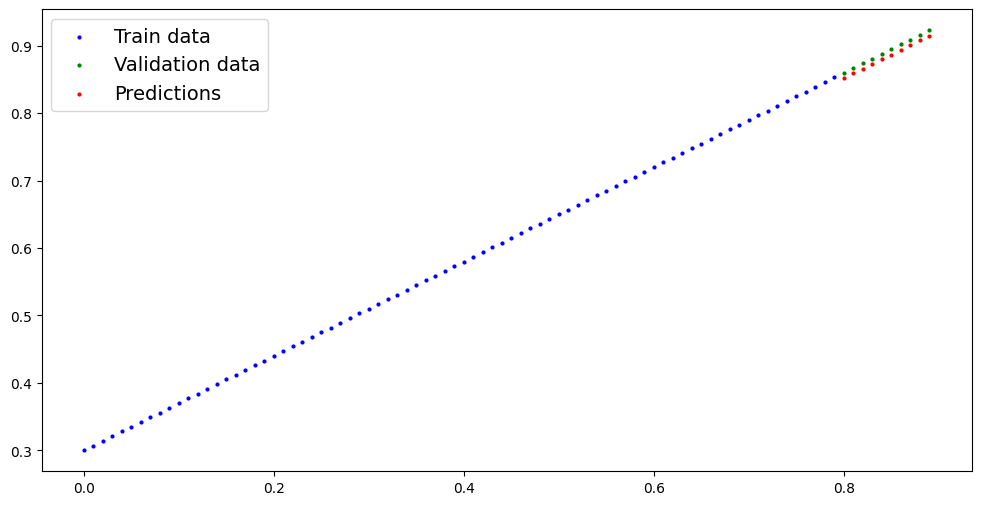

Epoch: 299, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


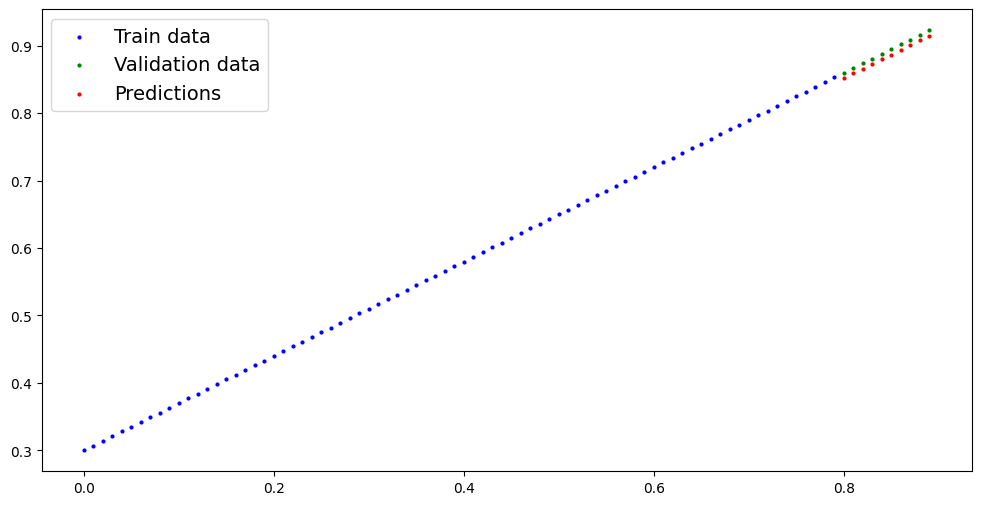

Epoch: 399, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


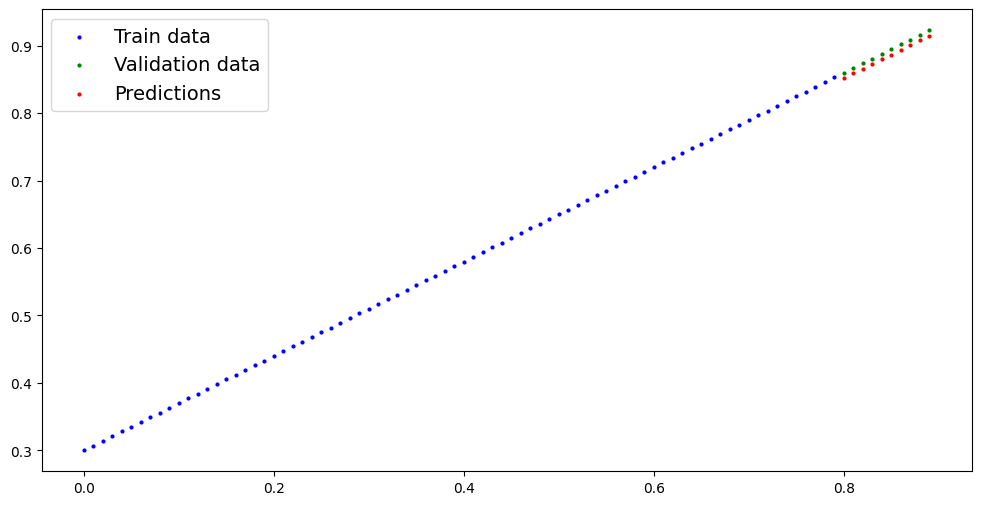

Epoch: 499, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


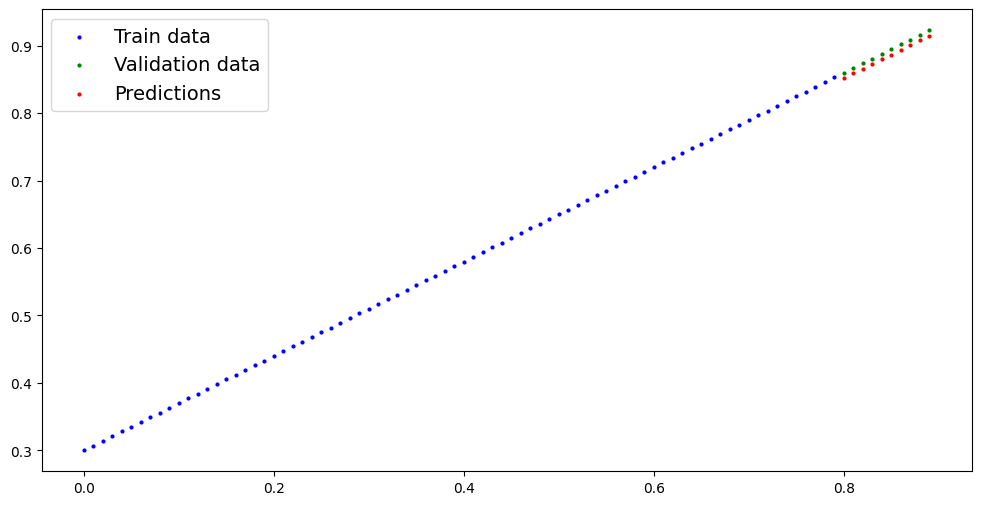

Epoch: 599, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


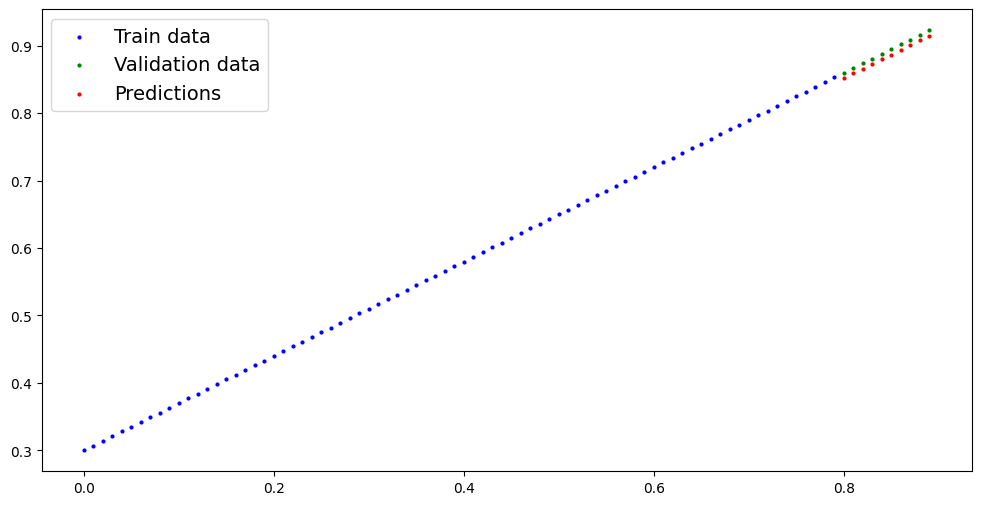

Epoch: 699, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


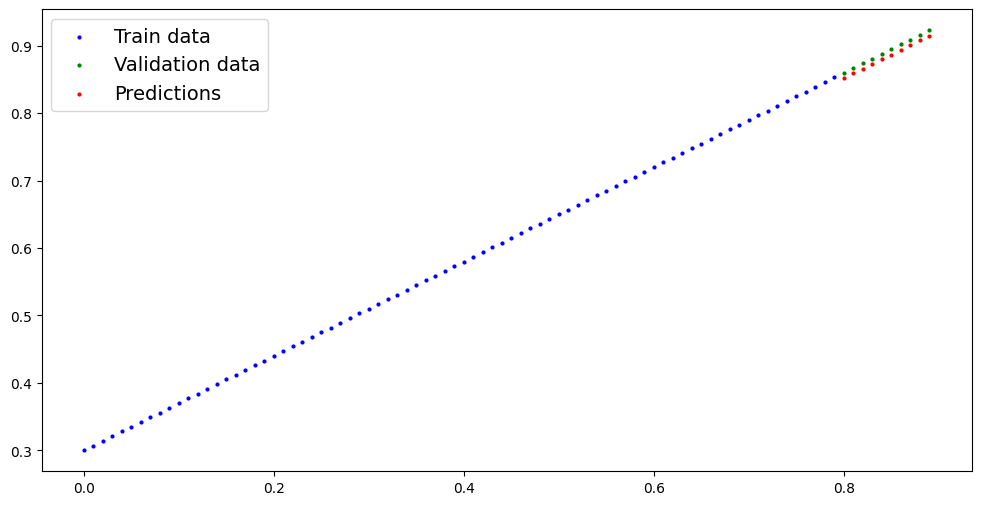

Epoch: 799, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


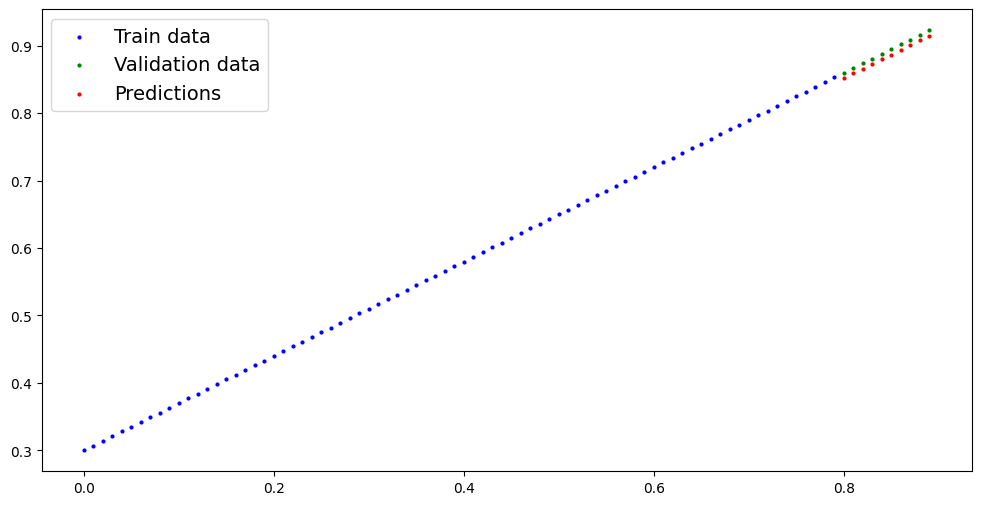

Epoch: 899, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


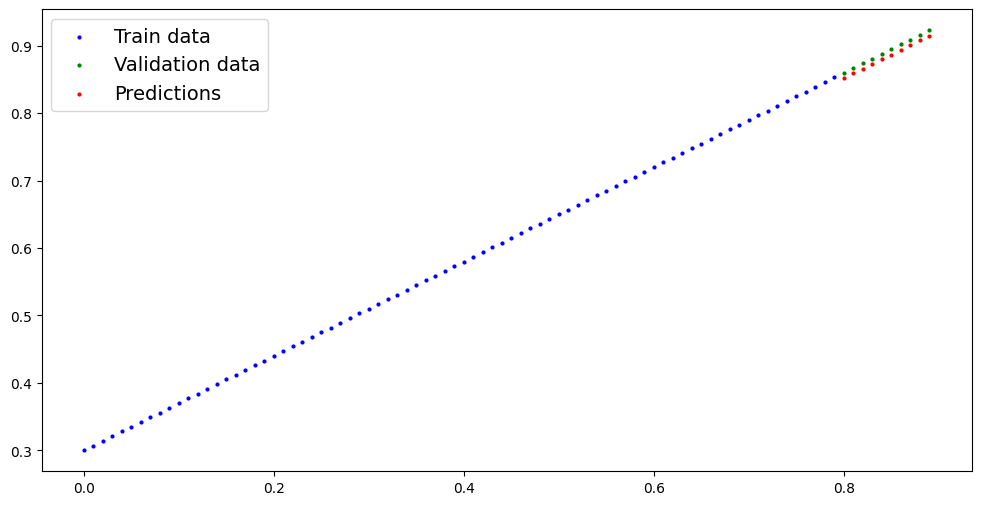

Epoch: 999, Loss: 0.006138725206255913, Validation loss: 0.007962721399962902
Weights: 0.6943528652191162, Bias: 0.2968091070652008


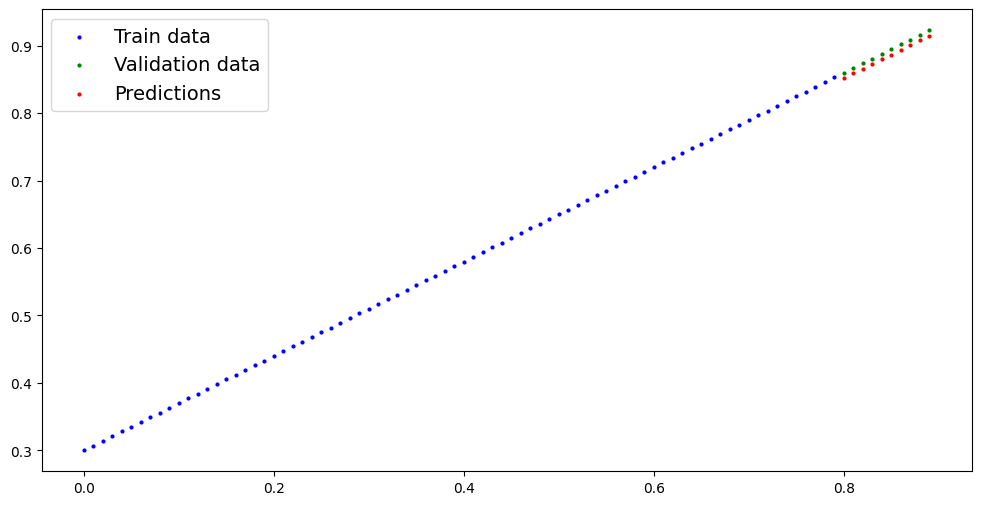

In [167]:
train_model(
    model_0,
    X_train,
    y_train,
    X_validation,
    y_validation,
    loss_fn,
    optimizer,
    epochs=1000
)

In [165]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6944])), ('bias', tensor([0.2968]))])